In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from init_dl import sigmoid,relu,compute_loss,forward_propagation,backward_propagation
from init_dl import update_parameters,predict,load_dataset,plot_decision_boundary,predict_dec

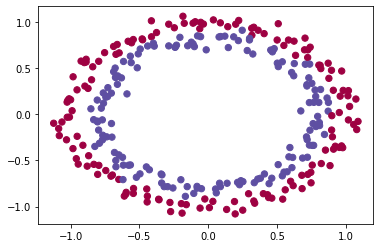

In [3]:
train_x,train_y,test_x,test_y=load_dataset()

In [17]:
def base_model(x,y,lr=0.03,num_itr=15000,initz="he"):
    grad={}
    costs=[]
    m=x.shape[1]
    layer_dim=[x.shape[0],10,5,1]
    if initz=="zeros":
        params=init_param_zero(layer_dim)
    elif initz=="random":
        params=init_param_random(layer_dim)
    elif initz=="he":
        params=init_param_he(layer_dim)
    
    
    for i in range(0,num_itr):
        a3,save=forward_propagation(x,params)
        
        cost=compute_loss(a3,y)
        grad=backward_propagation(x,y,save)
        
        params=update_parameters(params,grad,lr)
        
        if i%1000==0:
            print("cost @ {}:{}".format(i,cost))
        costs.append(cost)
    plt.plot(costs)
    plt.show()
    
    return params

In [18]:
def init_param_zero(dim):
    params={}
    L=len(dim)
    for l in range(1,L):
        params['W'+str(l)]=np.zeros((dim[l],dim[l-1]))
        params['b'+str(l)]=np.zeros((dim[l],1))
    return params

In [19]:
params=init_param_zero([3,2,1])
print(params["W1"])

[[0. 0. 0.]
 [0. 0. 0.]]


cost @ 0:0.6931471805599453
cost @ 1000:0.6931471805599453
cost @ 2000:0.6931471805599453
cost @ 3000:0.6931471805599453
cost @ 4000:0.6931471805599453
cost @ 5000:0.6931471805599453
cost @ 6000:0.6931471805599453
cost @ 7000:0.6931471805599453
cost @ 8000:0.6931471805599453
cost @ 9000:0.6931471805599453
cost @ 10000:0.6931471805599453
cost @ 11000:0.6931471805599453
cost @ 12000:0.6931471805599453
cost @ 13000:0.6931471805599453
cost @ 14000:0.6931471805599453


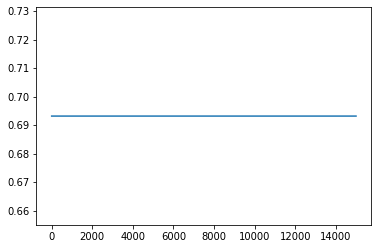

In [29]:
params_zero=base_model(train_x,train_y,initz="zeros")

In [24]:
def init_param_random(dim):
    params={}
    L=len(dim)
    
    for l in range(1,L):
        params['W'+str(l)]=np.random.randn(dim[l],dim[l-1])*10
        params['b'+str(l)]=np.zeros((dim[l],1))
        
    return params

In [25]:
params=init_param_random([3,2,1])
print(params["W1"])

[[  3.80321617 -11.8216109    6.00744915]
 [ -2.30044583  12.56429661 -13.29467822]]


C:\Users\vivek\init_dl.py:18: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))
C:\Users\vivek\init_dl.py:152: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3), Y) + \
C:\Users\vivek\init_dl.py:152: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3), Y) + \
C:\Users\vivek\init_dl.py:153: RuntimeWarning: divide by zero encountered in log
  np.multiply(-np.log(1 - a3), 1 - Y)
C:\Users\vivek\init_dl.py:153: RuntimeWarning: invalid value encountered in multiply
  np.multiply(-np.log(1 - a3), 1 - Y)


cost @ 0:inf
cost @ 1000:0.4436126062555986
cost @ 2000:0.4327058250331279
cost @ 3000:0.4281040057052188
cost @ 4000:0.43061474731401084
cost @ 5000:0.42827299698156995
cost @ 6000:0.426506426378636
cost @ 7000:0.424991200422677
cost @ 8000:0.4233247587948814
cost @ 9000:0.42149351587321066
cost @ 10000:0.4200838314501843
cost @ 11000:0.41772133399457057
cost @ 12000:0.4166359202058402
cost @ 13000:0.41564989455396045
cost @ 14000:0.41467850113759597


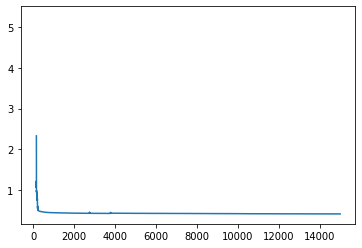

In [30]:
params_random=base_model(train_x,train_y,initz="random")

In [27]:
def init_param_he(dim):
    params={}
    L=len(dim)
    
    for l in range(1,L):
        params['W'+str(l)]=np.random.randn(dim[l],dim[l-1])*np.sqrt(2/dim[l-1])
        params['b'+str(l)]=np.zeros((dim[l],1))
    return params

cost @ 0:0.7376150792660557
cost @ 1000:0.6227894171165519
cost @ 2000:0.4300531158182732
cost @ 3000:0.1908421332158816
cost @ 4000:0.1019312175604794
cost @ 5000:0.07086658853813362
cost @ 6000:0.05550431125040024
cost @ 7000:0.04739933860301007
cost @ 8000:0.04098046905590521
cost @ 9000:0.03693695689095852
cost @ 10000:0.03404904264811327
cost @ 11000:0.03181796919897139
cost @ 12000:0.030036396564296224
cost @ 13000:0.028559106635394793
cost @ 14000:0.027310668610256612


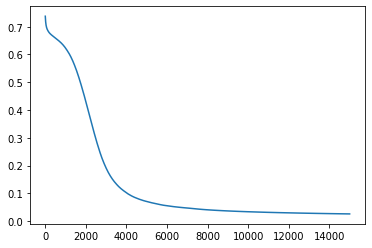

In [31]:
params_he=base_model(train_x,train_y,initz="he")

In [32]:
predict_train1=predict(train_x,train_y,params_zero)
predict_train2=predict(train_x,train_y,params_random)
predict_train3=predict(train_x,train_y,params_he)

Accuracy: 0.5
Accuracy: 0.7933333333333333
Accuracy: 0.99


In [33]:
predict_test1=predict(test_x,test_y,params_zero)
predict_test2=predict(test_x,test_y,params_random)
predict_test3=predict(test_x,test_y,params_he)

Accuracy: 0.5
Accuracy: 0.71
Accuracy: 0.94
